In [1]:
import os
import pandas as pd
from importlib import reload
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from scipy import stats
from pingouin import welch_anova

/Users/alessandro/CSCvenv/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
os.chdir("..")

In [3]:
from my_modules.feature_extraction import one_hot
from my_modules import evaluate_performance
from my_modules.evaluate_performance import mcnemar_test

In [4]:
os.chdir("context_analysis")

# Load the results

In [5]:
with open("results/y.p", "rb") as fb:
    ytrues = pickle.load(fb)

with open("results/random_forests/di/vars.p", "rb") as fb:
    di = pickle.load(fb) # digging results

with open("results/random_forests/sc/vars.p", "rb") as fb:
    sc = pickle.load(fb) # scrabbling results

with open("results/random_forests/mx/vars.p", "rb") as fb:
    mx = pickle.load(fb) # scrabbling results


sc.keys()

dict_keys(['pred', 'pred_sc', 'pred_mx', 'probs', 'probs_sc', 'probs_mx', 'individuals_test'])

In [6]:
ytrues.keys()

dict_keys(['y', 'y_sc', 'y_mx', 'id', 'id_sc', 'id_mx'])

In [7]:
idxs_di = ytrues["id"]
idxs_sc = ytrues["id_sc"]
idxs_mx = ytrues["id_mx"]

# DI-Context metrics

In [8]:
%%capture
# auc
auc_di, _ = evaluate_performance.roc_auc(
    y=ytrues["y"][idxs_di], y_score=di["cprobs"],
    y_true=one_hot(ytrues["y"][idxs_di]), n_classes=5
)
auc_sc, _ = evaluate_performance.roc_auc(
    y=ytrues["y_sc"][idxs_sc], y_score=di["cprobs_sc"],
    y_true=one_hot(ytrues["y_sc"][idxs_sc]), n_classes=5
)
auc_mx, _ = evaluate_performance.roc_auc(
    y=ytrues["y_mx"][idxs_mx], y_score=di["cprobs_mx"],
    y_true=one_hot(ytrues["y_mx"][idxs_mx]), n_classes=5
)

# precision-recall
metr_di, _, _ = evaluate_performance.metrics(
    y=ytrues["y"][idxs_di], yp=di["cpred"],
    y_true=one_hot(ytrues["y"][idxs_di]),
    y_pred=one_hot(di["cpred"], num_classes=5),
    labels=di["individuals_test"]
)
metr_sc, _, _ = evaluate_performance.metrics(
    y=ytrues["y_sc"][idxs_sc], yp=di["cpred_sc"],
    y_true=one_hot(ytrues["y_sc"][idxs_sc]),
    y_pred=one_hot(di["cpred_sc"], num_classes=5),
    labels=di["individuals_test"]
)
metr_mx, _, _ = evaluate_performance.metrics(
    y=ytrues["y_mx"][idxs_mx], yp=di["cpred_mx"],
    y_true=one_hot(ytrues["y_mx"][idxs_mx]),
    y_pred=one_hot(di["cpred_mx"], num_classes=5),
    labels=di["individuals_test"]
)

# MCC
mcc_di = evaluate_performance.matthews(
    y=ytrues["y"][idxs_di], yp=di["cpred"]
)
mcc_sc = evaluate_performance.matthews(
    y=ytrues["y_sc"][idxs_sc], yp=di["cpred_sc"]
)
mcc_mx = evaluate_performance.matthews(
    y=ytrues["y_mx"][idxs_mx], yp=di["cpred_mx"]
)

In [9]:
di_m = {
    "auc_di": auc_di,
    "auc_sc": auc_sc,
    "auc_mx": auc_mx,
    "mcc_di": mcc_di,
    "mcc_sc": mcc_sc,
    "mcc_mx": mcc_mx,
    "metr_di": metr_di,
    "metr_sc": metr_sc,
    "metr_mx": metr_mx
}

# SC-Context metrics

In [10]:
%%capture
# auc
auc_di, _ = evaluate_performance.roc_auc(
    y=ytrues["y"][idxs_di], y_score=sc["probs"],
    y_true=one_hot(ytrues["y"][idxs_di]), n_classes=5
)
auc_sc, _ = evaluate_performance.roc_auc(
    y=ytrues["y_sc"][idxs_sc], y_score=sc["probs_sc"],
    y_true=one_hot(ytrues["y_sc"][idxs_sc]), n_classes=5
)
auc_mx, _ = evaluate_performance.roc_auc(
    y=ytrues["y_mx"][idxs_mx], y_score=sc["probs_mx"],
    y_true=one_hot(ytrues["y_mx"][idxs_mx]), n_classes=5
)

# precision-recall
metr_di, _, _ = evaluate_performance.metrics(
    y=ytrues["y"][idxs_di], yp=sc["pred"],
    y_true=one_hot(ytrues["y"][idxs_di]),
    y_pred=one_hot(sc["pred"], num_classes=5),
    labels=sc["individuals_test"]
)
metr_sc, _, _ = evaluate_performance.metrics(
    y=ytrues["y_sc"][idxs_sc], yp=sc["pred_sc"],
    y_true=one_hot(ytrues["y_sc"][idxs_sc]),
    y_pred=one_hot(sc["pred_sc"], num_classes=5),
    labels=sc["individuals_test"]
)
metr_mx, _, _ = evaluate_performance.metrics(
    y=ytrues["y_mx"][idxs_mx], yp=sc["pred_mx"],
    y_true=one_hot(ytrues["y_mx"][idxs_mx]),
    y_pred=one_hot(sc["pred_mx"], num_classes=5),
    labels=sc["individuals_test"]
)

# MCC
mcc_di = evaluate_performance.matthews(
    y=ytrues["y"][idxs_di], yp=sc["pred"]
)
mcc_sc = evaluate_performance.matthews(
    y=ytrues["y_sc"][idxs_sc], yp=sc["pred_sc"]
)
mcc_mx = evaluate_performance.matthews(
    y=ytrues["y_mx"][idxs_mx], yp=sc["pred_mx"]
)

In [11]:
sc_m = {
    "auc_di": auc_di,
    "auc_sc": auc_sc,
    "auc_mx": auc_mx,
    "mcc_di": mcc_di,
    "mcc_sc": mcc_sc,
    "mcc_mx": mcc_mx,
    "metr_di": metr_di,
    "metr_sc": metr_sc,
    "metr_mx": metr_mx
}

# mixed-Context metrics

In [12]:
%%capture
# auc
auc_di, _ = evaluate_performance.roc_auc(
    y=ytrues["y"][idxs_di], y_score=mx["probs"],
    y_true=one_hot(ytrues["y"][idxs_di]), n_classes=5
)
auc_sc, _ = evaluate_performance.roc_auc(
    y=ytrues["y_sc"][idxs_sc], y_score=mx["probs_sc"],
    y_true=one_hot(ytrues["y_sc"][idxs_sc]), n_classes=5
)
auc_mx, _ = evaluate_performance.roc_auc(
    y=ytrues["y_mx"][idxs_mx], y_score=mx["probs_mx"],
    y_true=one_hot(ytrues["y_mx"][idxs_mx]), n_classes=5
)

# precision-recall
metr_di, _, _ = evaluate_performance.metrics(
    y=ytrues["y"][idxs_di], yp=mx["pred"],
    y_true=one_hot(ytrues["y"][idxs_di]),
    y_pred=one_hot(mx["pred"], num_classes=5),
    labels=mx["individuals_test"]
)
metr_sc, _, _ = evaluate_performance.metrics(
    y=ytrues["y_sc"][idxs_sc], yp=mx["pred_sc"],
    y_true=one_hot(ytrues["y_sc"][idxs_sc]),
    y_pred=one_hot(mx["pred_sc"], num_classes=5),
    labels=mx["individuals_test"]
)
metr_mx, _, _ = evaluate_performance.metrics(
    y=ytrues["y_mx"][idxs_mx], yp=mx["pred_mx"],
    y_true=one_hot(ytrues["y_mx"][idxs_mx]),
    y_pred=one_hot(mx["pred_mx"], num_classes=5),
    labels=mx["individuals_test"]
)

# MCC
mcc_di = evaluate_performance.matthews(
    y=ytrues["y"][idxs_di], yp=mx["pred"]
)
mcc_sc = evaluate_performance.matthews(
    y=ytrues["y_sc"][idxs_sc], yp=mx["pred_sc"]
)
mcc_mx = evaluate_performance.matthews(
    y=ytrues["y_mx"][idxs_mx], yp=mx["pred_mx"]
)

In [13]:
mx_m = {
    "auc_di": auc_di,
    "auc_sc": auc_sc,
    "auc_mx": auc_mx,
    "mcc_di": mcc_di,
    "mcc_sc": mcc_sc,
    "mcc_mx": mcc_mx,
    "metr_di": metr_di,
    "metr_sc": metr_sc,
    "metr_mx": metr_mx
}

# Testing

## Testing on DI context

In [14]:
# create metrics measures for each fold
def eval_fold(y, pred, prob, n_folds, n_classes, labels):

    auc = []
    mcc = []
    prec = []
    rec = []


    for i in range(n_folds):
        s = i * len(pred)//n_folds
        f = i * len(pred)//n_folds + len(pred)//n_folds

        tmp, _ = evaluate_performance.roc_auc(
            y=y[s:f], y_score=prob[s:f, :],
            y_true=one_hot(y[s:f]), n_classes=n_classes
        )
        auc.append(tmp)

        tmp = evaluate_performance.matthews(
            y=y[s:f], yp=pred[s:f]
        )
        mcc.append(tmp)

        tmp, _, _ = evaluate_performance.metrics(
            y=y[s:f], yp=pred[s:f],
            y_true=one_hot(y[s:f]),
            y_pred=one_hot(pred[s:f], num_classes=n_classes),
            labels=labels
        )
        prec.append(tmp.iloc[n_classes]["Precision"])
        rec.append(tmp.iloc[n_classes]["Recall"])

    
    return auc, mcc, prec, rec

In [15]:
%%capture
d = {
    "training_DI": eval_fold(
        y=ytrues["y"][idxs_di], pred=di["cpred"],
        prob=di["cprobs"], n_folds=10,
        n_classes=5, labels=di["individuals_test"]
    ),
    "training_SC": eval_fold(
        y=ytrues["y"][idxs_di], pred=sc["pred"],
        prob=sc["probs"], n_folds=10,
        n_classes=5, labels=sc["individuals_test"]
    ),
    "training_mixed": eval_fold(
        y=ytrues["y"][idxs_di], pred=mx["pred"],
        prob=mx["probs"], n_folds=10,
        n_classes=5, labels=mx["individuals_test"]
    )
}

In [16]:
df_di = pd.DataFrame(columns=["context", "metric", "value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "context": [k.split("_")[-1]] * len(x[0]) * 4,
            "metric": ["AUC"] * len(x[0]) + ["MCC"] * len(x[1]) + \
                ["Precision"] * len(x[2]) +  ["Recall"] * len(x[3]),
            "value": x[0] + x[1] + x[2] + x[3]
        }
    )

    df_di = df_di.append(tmp, ignore_index=True)

df_di

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1844702757.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_di = df_di.append(tmp, ignore_index=True)


context  metric value
0        DI     AUC  0.75
1        DI     AUC   0.8
2        DI     AUC  0.75
3        DI     AUC   0.8
4        DI     AUC   0.9
..      ...     ...   ...
115   mixed  Recall   0.6
116   mixed  Recall   0.4
117   mixed  Recall   0.4
118   mixed  Recall   0.4
119   mixed  Recall   0.4

[120 rows x 3 columns]

In [17]:
# McNemar's test

def mcnemar(y, clf1_pred, clf2_pred):

    chi, p, _ = mcnemar_test(
        y_true=y,
        clf1_pred=clf1_pred,
        clf2_pred=clf2_pred,
        print_contingency=False
        )
            
    return chi, p

In [18]:
d = {
    "DI vs. SC": mcnemar(
        y=ytrues["y"][idxs_di],
        clf1_pred=di["cpred"],
        clf2_pred=sc["pred"]
    ),
    "DI vs. mixed": mcnemar(
        y=ytrues["y"][idxs_di],
        clf1_pred=di["cpred"],
        clf2_pred=mx["pred"]
    ),
    "SC vs. mixed": mcnemar(
        y=ytrues["y"][idxs_di],
        clf1_pred=sc["pred"],
        clf2_pred=mx["pred"]
    )
}

In [19]:
df_mcnemar_di = pd.DataFrame(columns=["test", "Chi", "p-value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "test": [k],
            "Chi": x[0],
            "p-value": x[1]
        }
    )

    df_mcnemar_di = df_mcnemar_di.append(tmp, ignore_index=True)

df_mcnemar_di

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/3167736472.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mcnemar_di = df_mcnemar_di.append(tmp, ignore_index=True)


test       Chi   p-value
0     DI vs. SC  0.642857  0.422678
1  DI vs. mixed     6.125  0.013328
2  SC vs. mixed      0.75  0.386476

/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[None, None, None, None, None, None]

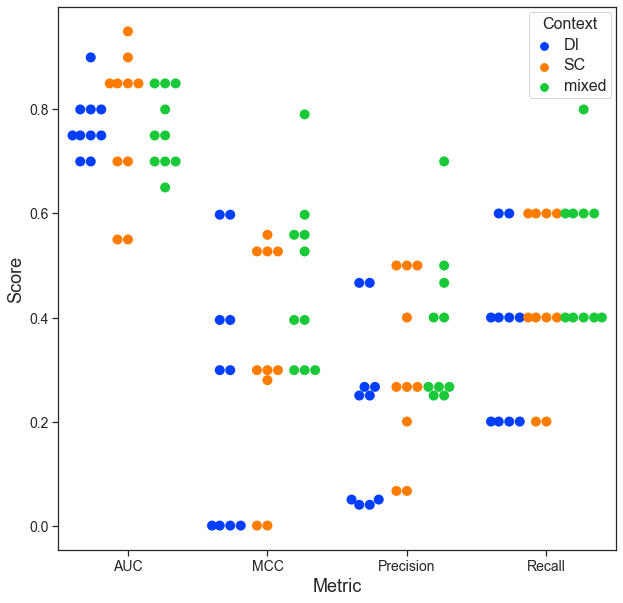

In [20]:
sns.set(style="ticks")
sns.set_palette("bright")

fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.swarmplot(
    x="metric", y="value", hue="context", data=df_di,
    s=10, dodge=True
)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Metric", fontsize=18)
ax.set_ylabel("Score", fontsize=18)
ax.legend(
    title="Context", title_fontsize=16
    )
plt.setp(ax.get_legend().get_texts(), fontsize=16)

## Testing on SC context

In [21]:
%%capture
d = {
    "training_DI": eval_fold(
        y=ytrues["y_sc"][idxs_sc], pred=di["cpred_sc"],
        prob=di["cprobs_sc"], n_folds=10,
        n_classes=5, labels=di["individuals_test"]
    ),
    "training_SC": eval_fold(
        y=ytrues["y_sc"][idxs_sc], pred=sc["pred_sc"],
        prob=sc["probs_sc"], n_folds=10,
        n_classes=5, labels=sc["individuals_test"]
    ),
    "training_mixed": eval_fold(
        y=ytrues["y_sc"][idxs_sc], pred=mx["pred_sc"],
        prob=mx["probs_sc"], n_folds=10,
        n_classes=5, labels=mx["individuals_test"]
    )
}

In [22]:
df_sc = pd.DataFrame(columns=["context", "metric", "value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "context": [k.split("_")[-1]] * len(x[0]) * 4,
            "metric": ["AUC"] * len(x[0]) + ["MCC"] * len(x[1]) + \
                ["Precision"] * len(x[2]) +  ["Recall"] * len(x[3]),
            "value": x[0] + x[1] + x[2] + x[3]
        }
    )

    df_sc = df_sc.append(tmp, ignore_index=True)

df_sc

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1798991003.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sc = df_sc.append(tmp, ignore_index=True)


context  metric value
0        DI     AUC   0.5
1        DI     AUC   0.6
2        DI     AUC  0.45
3        DI     AUC  0.35
4        DI     AUC   0.4
..      ...     ...   ...
115   mixed  Recall   0.2
116   mixed  Recall   0.2
117   mixed  Recall   0.4
118   mixed  Recall   0.4
119   mixed  Recall   0.0

[120 rows x 3 columns]

In [23]:
d = {
    "DI vs. SC": mcnemar(
        y=ytrues["y_sc"][idxs_sc],
        clf1_pred=di["cpred_sc"],
        clf2_pred=sc["pred_sc"]
    ),
    "DI vs. mixed": mcnemar(
        y=ytrues["y_sc"][idxs_sc],
        clf1_pred=di["cpred_sc"],
        clf2_pred=mx["pred_sc"]
    ),
    "SC vs. mixed": mcnemar(
        y=ytrues["y_sc"][idxs_sc],
        clf1_pred=sc["pred_sc"],
        clf2_pred=mx["pred_sc"]
    )
}

In [24]:
df_mcnemar_sc = pd.DataFrame(columns=["test", "Chi", "p-value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "test": [k],
            "Chi": x[0],
            "p-value": x[1]
        }
    )

    df_mcnemar_sc = df_mcnemar_sc.append(tmp, ignore_index=True)

df_mcnemar_sc

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/3152678218.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mcnemar_sc = df_mcnemar_sc.append(tmp, ignore_index=True)


test        Chi   p-value
0     DI vs. SC     18.375  0.000018
1  DI vs. mixed   0.166667  0.683091
2  SC vs. mixed  16.409091  0.000051

/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[None, None, None, None, None, None]

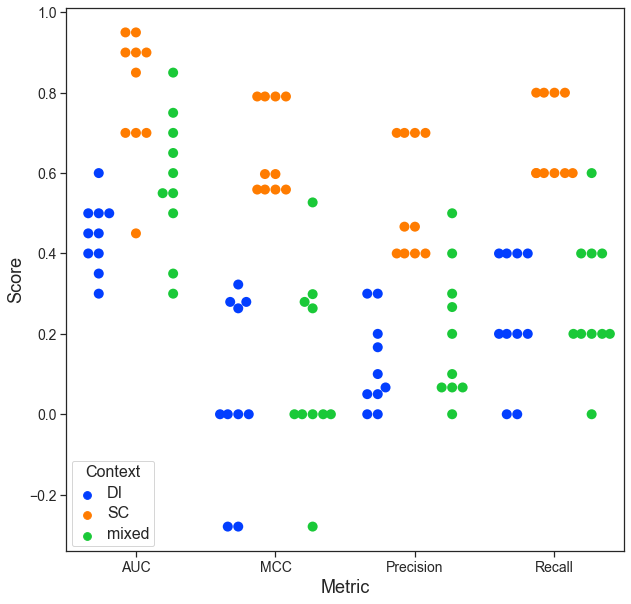

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.swarmplot(
    x="metric", y="value", hue="context", data=df_sc,
    s=10, dodge=True
)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Metric", fontsize=18)
ax.set_ylabel("Score", fontsize=18)
ax.legend(
    title="Context", title_fontsize=16
    )
plt.setp(ax.get_legend().get_texts(), fontsize=16)

## Testing on mixed context

In [26]:
%%capture
d = {
    "training_DI": eval_fold(
        y=ytrues["y_mx"][idxs_mx], pred=di["cpred_mx"],
        prob=di["cprobs_mx"], n_folds=10,
        n_classes=5, labels=di["individuals_test"]
    ),
    "training_SC": eval_fold(
        y=ytrues["y_mx"][idxs_mx], pred=sc["pred_mx"],
        prob=sc["probs_mx"], n_folds=10,
        n_classes=5, labels=sc["individuals_test"]
    ),
    "training_mixed": eval_fold(
        y=ytrues["y_mx"][idxs_mx], pred=mx["pred_mx"],
        prob=mx["probs_mx"], n_folds=10,
        n_classes=5, labels=mx["individuals_test"]
    )
}

In [27]:
df_mx = pd.DataFrame(columns=["context", "metric", "value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "context": [k.split("_")[-1]] * len(x[0]) * 4,
            "metric": ["AUC"] * len(x[0]) + ["MCC"] * len(x[1]) + \
                ["Precision"] * len(x[2]) +  ["Recall"] * len(x[3]),
            "value": x[0] + x[1] + x[2] + x[3]
        }
    )

    df_mx = df_mx.append(tmp, ignore_index=True)

df_mx

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/482782481.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mx = df_mx.append(tmp, ignore_index=True)


context  metric value
0        DI     AUC  0.75
1        DI     AUC  0.65
2        DI     AUC   0.7
3        DI     AUC   0.8
4        DI     AUC  0.75
..      ...     ...   ...
115   mixed  Recall   0.2
116   mixed  Recall   0.2
117   mixed  Recall   0.4
118   mixed  Recall   0.4
119   mixed  Recall   0.6

[120 rows x 3 columns]

In [28]:
d = {
    "DI vs. SC": mcnemar(
        y=ytrues["y_mx"][idxs_mx],
        clf1_pred=di["cpred_mx"],
        clf2_pred=sc["pred_mx"]
    ),
    "DI vs. mixed": mcnemar(
        y=ytrues["y_mx"][idxs_mx],
        clf1_pred=di["cpred_mx"],
        clf2_pred=mx["pred_mx"]
    ),
    "SC vs. mixed": mcnemar(
        y=ytrues["y_mx"][idxs_mx],
        clf1_pred=sc["pred_mx"],
        clf2_pred=mx["pred_mx"]
    )
}

In [29]:
df_mcnemar_mx = pd.DataFrame(columns=["test", "Chi", "p-value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "test": [k],
            "Chi": x[0],
            "p-value": x[1]
        }
    )

    df_mcnemar_mx = df_mcnemar_mx.append(tmp, ignore_index=True)

df_mcnemar_mx

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1414746923.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mcnemar_mx = df_mcnemar_mx.append(tmp, ignore_index=True)


test       Chi   p-value
0     DI vs. SC  6.857143  0.008829
1  DI vs. mixed  4.166667  0.041227
2  SC vs. mixed  2.117647   0.14561

/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[None, None, None, None, None, None]

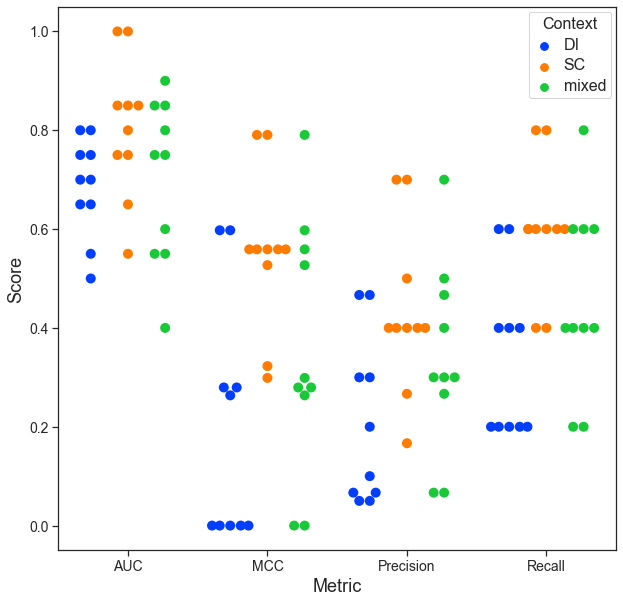

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.swarmplot(
    x="metric", y="value", hue="context", data=df_mx,
    s=10, dodge=True
)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Metric", fontsize=18)
ax.set_ylabel("Score", fontsize=18)
ax.legend(
    title="Context", title_fontsize=16
    )
plt.setp(ax.get_legend().get_texts(), fontsize=16)

# Full picture

In [42]:
df = df_di
df = df.append([df_sc, df_mx])

df["testing"] = ["DI"] * df_di.shape[0] + ["SC"] * df_sc.shape[0] + ["mixed"] * df_mx.shape[0]

df.value = df.value.astype(np.float64)
df

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/58482539.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([df_sc, df_mx])


context  metric  value testing
0        DI     AUC   0.75      DI
1        DI     AUC   0.80      DI
2        DI     AUC   0.75      DI
3        DI     AUC   0.80      DI
4        DI     AUC   0.90      DI
..      ...     ...    ...     ...
115   mixed  Recall   0.20   mixed
116   mixed  Recall   0.20   mixed
117   mixed  Recall   0.40   mixed
118   mixed  Recall   0.40   mixed
119   mixed  Recall   0.60   mixed

[360 rows x 4 columns]

In [43]:
df.reset_index(drop=True, inplace=True)

## pairwise for testing datasets

/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[None, None, None, None, None, None]

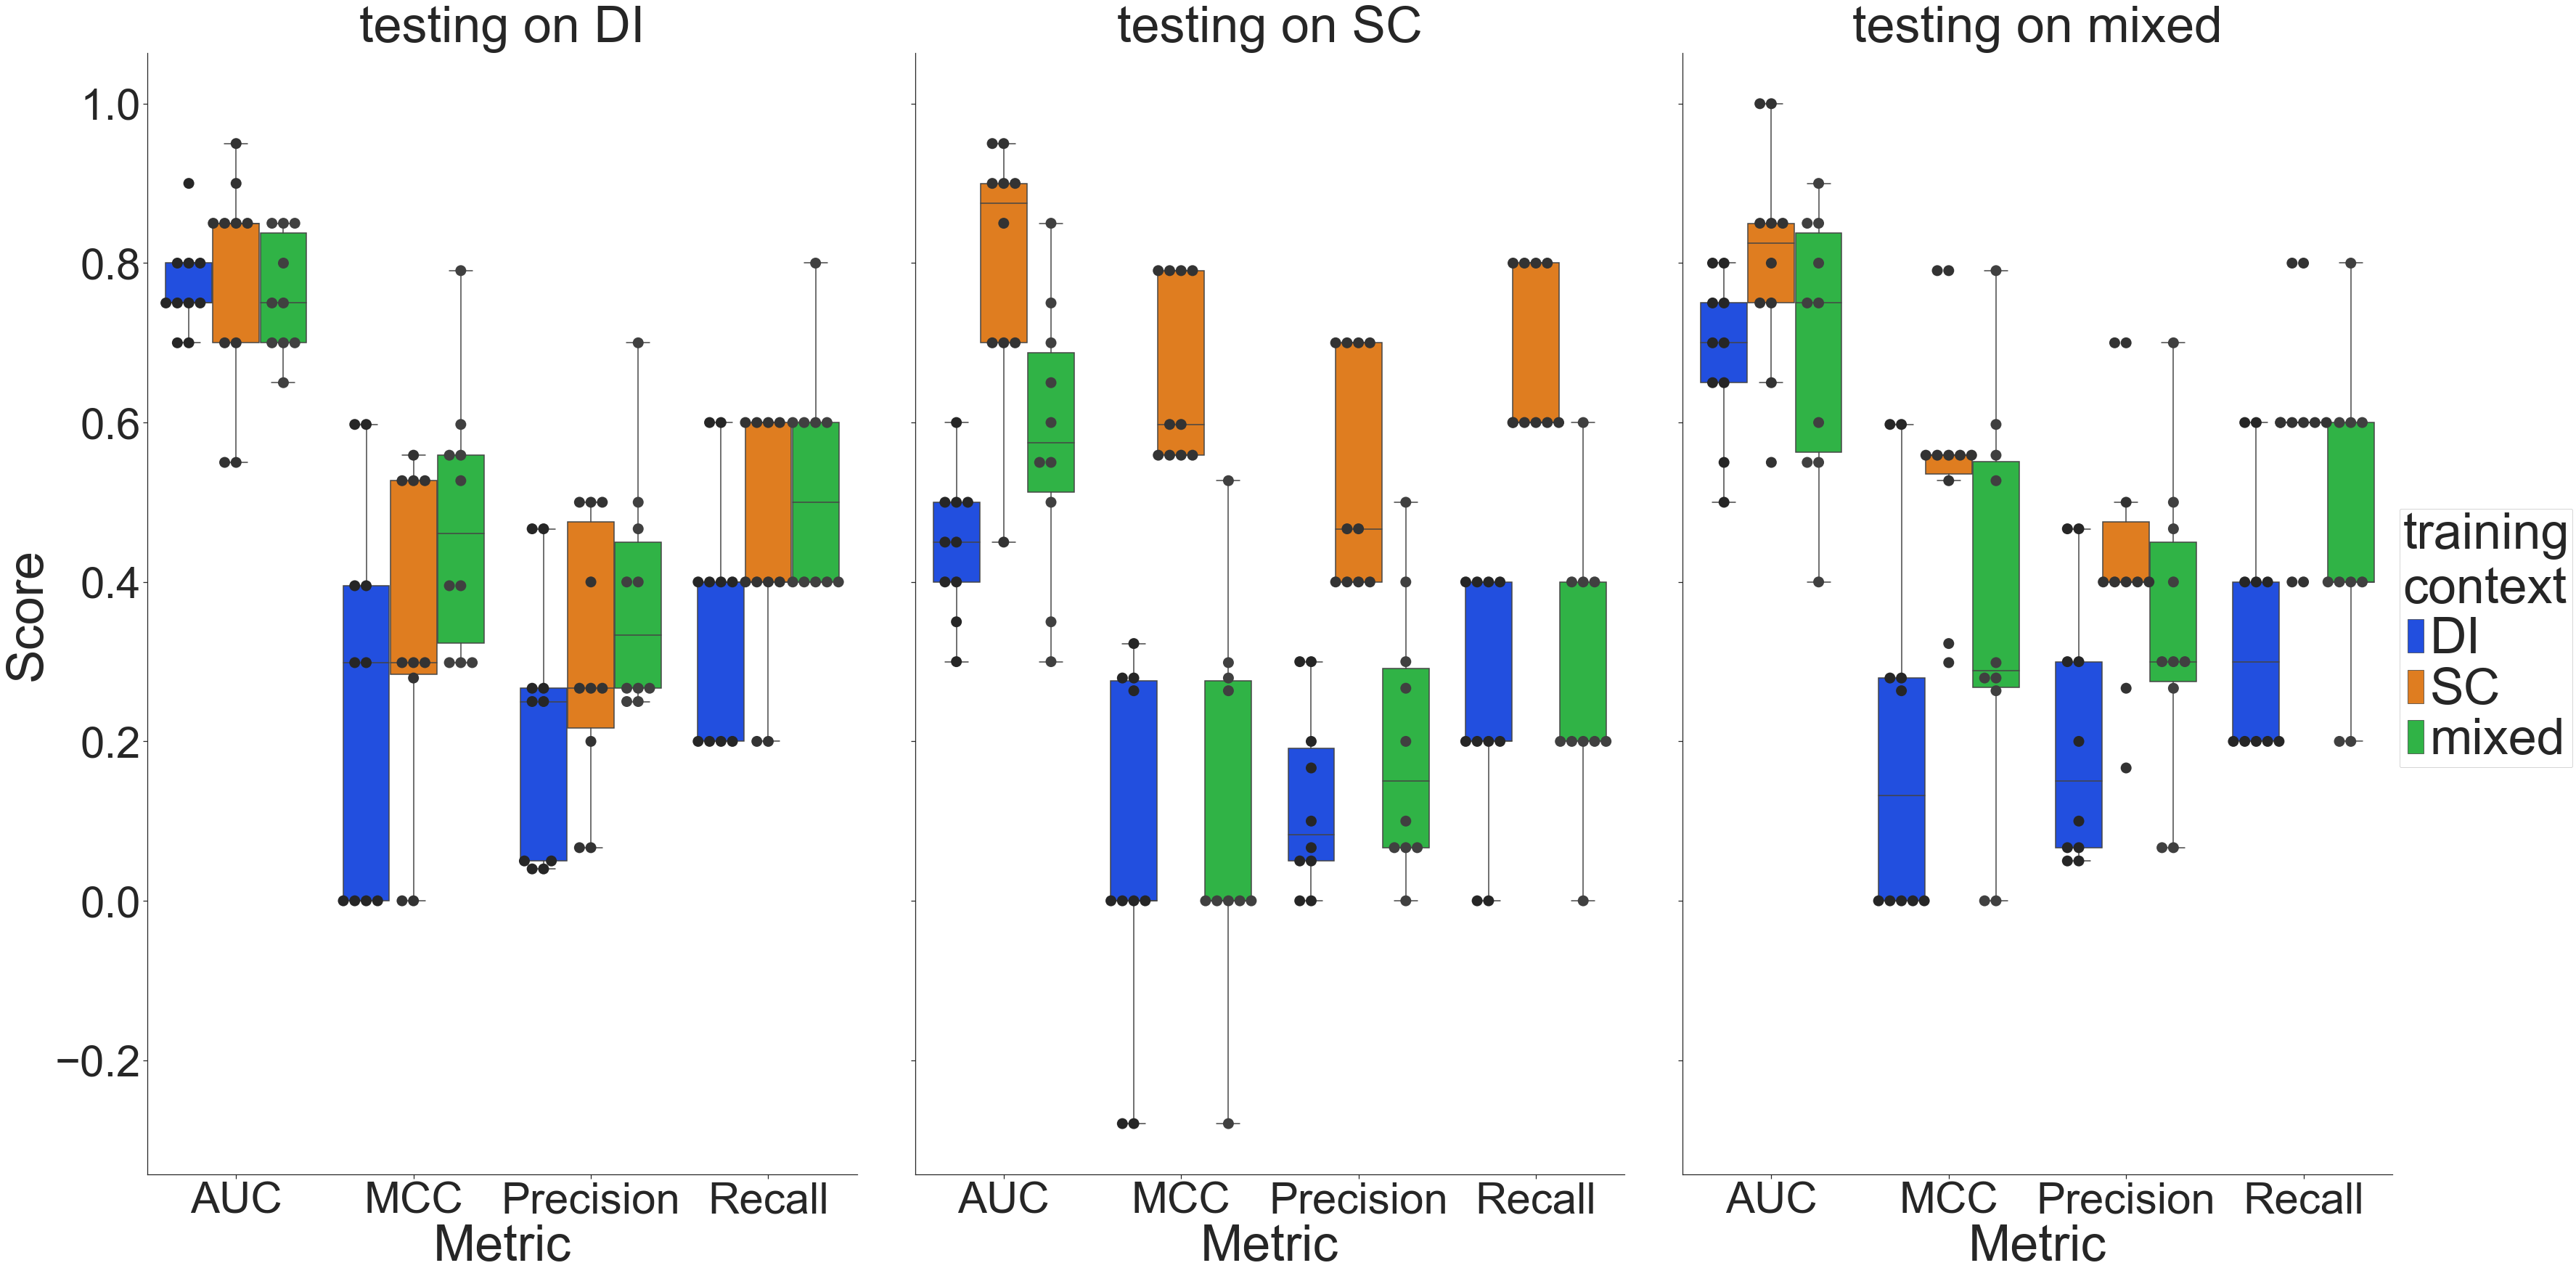

In [58]:
sns.set(rc={
    "font.size": 18, "axes.labelsize": 18, 
    "xtick.labelsize": 13, "ytick.labelsize": 13
    }, style="ticks")
sns.set_palette("bright")

g = sns.catplot(
    data=df, x="metric", y="value", hue="context", col="testing",
    kind="box"
)

fig = plt.gcf()
fig.set_size_inches(50, 30)

axs = fig.get_axes()

for i, ax in enumerate(axs):
    sns.swarmplot(
        data=df.loc[df.testing==df.testing.unique()[i]],
        x="metric", y="value", hue="context", color=".25", s=15,
        dodge=True, ax=ax
    )
    ax.tick_params(axis="both", labelsize=60)
    ax.get_legend().remove()

g.set_titles("testing on {col_name}", size=70)
g.set_axis_labels(x_var="Metric", y_var="Score", fontsize=70)

g._legend.set_title("training\ncontext")
g._legend.set_frame_on(True)
for h in g._legend.legendHandles:
    h.set_height(h.get_height()*6)
plt.setp(g._legend.get_title(), fontsize=70)
plt.setp(g._legend.get_texts(), fontsize=70)

In [34]:
df.groupby(["testing", "metric", "context"]).mean().round(3).to_clipboard()
df.groupby(["testing", "metric", "context"]).mean()

value
testing metric    context          
DI      AUC       DI       0.770000
                  SC       0.775000
                  mixed    0.760000
        MCC       DI       0.258341
                  SC       0.331609
                  mixed    0.472025
        Precision DI       0.214667
                  SC       0.303333
                  mixed    0.376667
        Recall    DI       0.360000
                  SC       0.440000
                  mixed    0.520000
SC      AUC       DI       0.445000
                  SC       0.800000
                  mixed    0.580000
        MCC       DI       0.058627
                  SC       0.659357
                  mixed    0.108938
        Precision DI       0.123333
                  SC       0.533333
                  mixed    0.196667
        Recall    DI       0.240000
                  SC       0.680000
                  mixed    0.280000
mixed   AUC       DI       0.685000
                  SC       0.805000
                  mixed    0.700000
        MCC       DI       0.201777
                  SC       0.552483
                  mixed    0.359559
        Precision DI       0.206667
                  SC       0.433333
                  mixed    0.336667
        Recall    DI       0.340000
                  SC       0.600000
                  mixed    0.460000

In [35]:
df_mcnemar = pd.DataFrame(
    {
        "testing": ["DI"] * 3 + ["SC"] * 3 + ["mixed"] * 3
    }
)

tmp = pd.concat([df_mcnemar_di, df_mcnemar_sc, df_mcnemar_mx], axis=0, ignore_index=True)

df_mcnemar = pd.concat([df_mcnemar, tmp], axis=1)

dd = df_mcnemar.round(3).copy(deep=True)

dd["p-value"].astype(np.str_)

def fun(x):
    if float(x) < 0.001:
        return "<0.001"
    else:
        return str(x)

l = []
for i, p in enumerate(dd["p-value"]):

    l.append(fun(p))

dd["p-value"] = l
dd.to_clipboard()


df_mcnemar.groupby(["testing", "test"]).mean() # not an actual mean

Chi   p-value
testing test                             
DI      DI vs. SC      0.642857  0.422678
        DI vs. mixed   6.125000  0.013328
        SC vs. mixed   0.750000  0.386476
SC      DI vs. SC     18.375000  0.000018
        DI vs. mixed   0.166667  0.683091
        SC vs. mixed  16.409091  0.000051
mixed   DI vs. SC      6.857143  0.008829
        DI vs. mixed   4.166667  0.041227
        SC vs. mixed   2.117647  0.145610

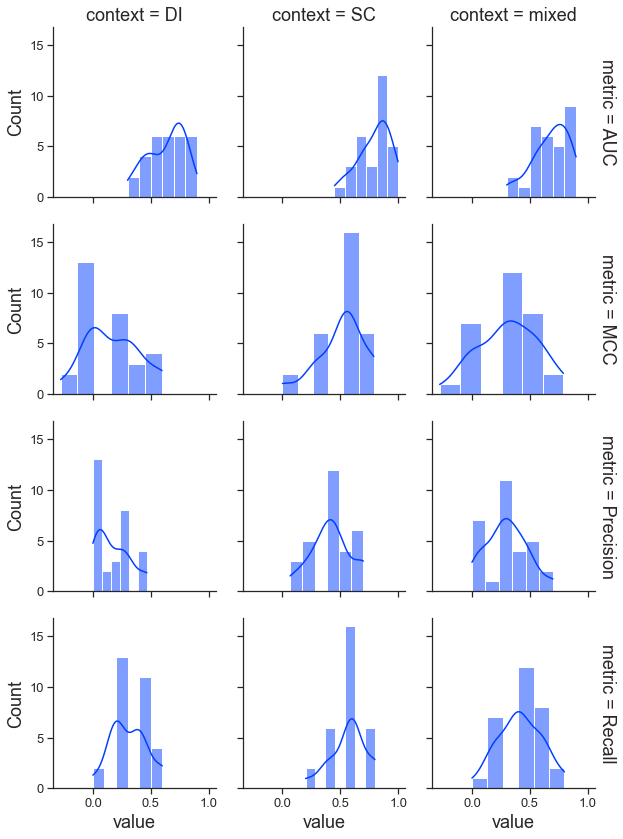

In [36]:
g = sns.FacetGrid(
    data=df, row="metric", col="context",
    margin_titles=True
)
g.map_dataframe(
    sns.histplot, x="value", kde=True
)

In [44]:
# Welch ANOVA
W_aov = pd.DataFrame(columns=["testing", "metric", "Source", "ddof1", "ddof2", "F", "p-unc", "np2"])
for metr in df.metric.unique():

    # for DI testing
    aov = welch_anova(
        data=df.loc[(df.testing=="DI") & (df.metric==metr)],
        dv="value", between="context"
        )
    tmp = tmp = pd.DataFrame({
        "testing":["DI"],
        "metric": metr
    })
    tmp = pd.concat([tmp, aov], axis=1)
    W_aov = W_aov.append(tmp)

    # for SC testing
    aov = welch_anova(
        data=df.loc[(df.testing=="SC") & (df.metric==metr)],
        dv="value", between="context"
        )
    tmp = tmp = pd.DataFrame({
        "testing":["SC"],
        "metric": metr
    })
    tmp = pd.concat([tmp, aov], axis=1)
    W_aov = W_aov.append(tmp)

    # for mixed testing
    aov = welch_anova(
        data=df.loc[(df.testing=="mixed") & (df.metric==metr)],
        dv="value", between="context"
        )
    tmp = tmp = pd.DataFrame({
        "testing":["mixed"],
        "metric": metr
    })
    tmp = pd.concat([tmp, aov], axis=1)
    W_aov = W_aov.append(tmp)

dd = W_aov.round(3).copy(deep=True)

dd["p-unc"].astype(np.str_)

def fun(x):
    if float(x) < 0.001:
        return "<0.001"
    else:
        return str(x)

l = []
for i, p in enumerate(dd["p-unc"]):

    l.append(fun(p))

dd["p-unc"] = l
dd.to_clipboard()

W_aov

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/2447705049.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/2447705049.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/2447705049.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/2447705049.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng31

testing     metric   Source ddof1      ddof2          F     p-unc       np2
0      DI        AUC  context     2  16.673587   0.071108  0.931642  0.004446
0      SC        AUC  context     2  16.222593  18.738463  0.000061  0.534953
0   mixed        AUC  context     2  17.195501   2.424334  0.118164  0.142977
0      DI        MCC  context     2   17.48244   2.991651  0.076312  0.168065
0      SC        MCC  context     2  16.022144  41.322405       0.0  0.680562
0   mixed        MCC  context     2  17.105574   7.402043  0.004831  0.312294
0      DI  Precision  context     2   17.93772   2.544962  0.106424  0.158336
0      SC  Precision  context     2  17.524736  24.682922  0.000008  0.633177
0   mixed  Precision  context     2  17.927761   4.453045   0.02691  0.235966
0      DI     Recall  context     2  17.937716   2.789195  0.088161  0.170213
0      SC     Recall  context     2  17.056152  35.824972  0.000001  0.672727
0   mixed     Recall  context     2  17.617816   7.396508  0.004655    0.3175

## all testing combined

/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alessandro/CSCvenv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


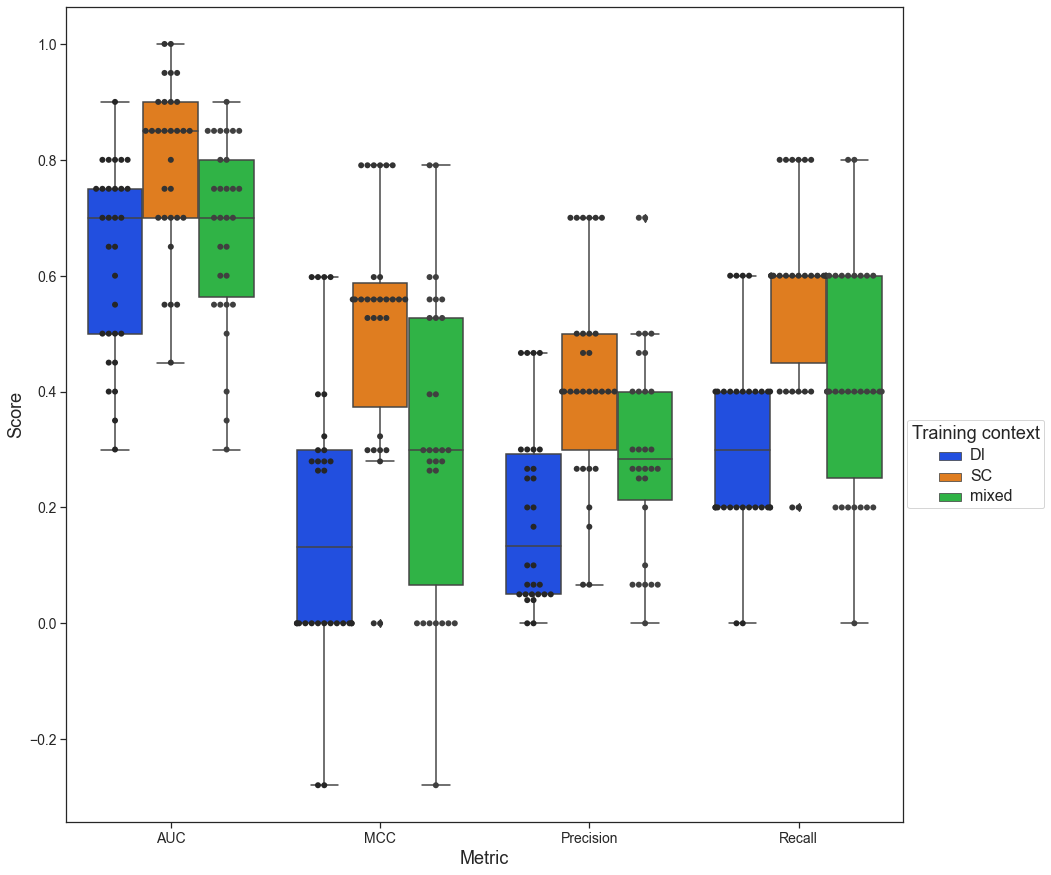

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

sns.boxplot(
    x="metric", y="value", hue="context", data=df, ax=ax
)
sns.swarmplot(
    x="metric", y="value", data=df, hue="context", dodge=True, 
    color=".25", s=6
)

ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Metric", fontsize=18)
ax.set_ylabel("Score", fontsize=18)

hands, labs = ax.get_legend_handles_labels()
ax.legend(hands[:3], labs[:3])
ax.get_legend().set_title("Training context")
plt.setp(ax.get_legend().get_title(), fontsize=18)
plt.setp(ax.get_legend().get_texts(), fontsize=16)
ax.get_legend().set_bbox_to_anchor(bbox=(1.175, 0.5))

In [46]:
df.groupby(["metric", "context"]).mean().round(3).to_clipboard()
df.groupby(["metric", "context"]).mean()

value
metric    context          
AUC       DI       0.633333
          SC       0.793333
          mixed    0.680000
MCC       DI       0.172915
          SC       0.514483
          mixed    0.313508
Precision DI       0.181556
          SC       0.423333
          mixed    0.303333
Recall    DI       0.313333
          SC       0.573333
          mixed    0.420000

In [47]:
# McNemar test on all
di_pred = np.zeros(shape=(di["cpred"].shape[0]*3))
sc_pred = np.zeros(shape=(di["cpred"].shape[0]*3))
mx_pred = np.zeros(shape=(di["cpred"].shape[0]*3))

y = np.array([
    ytrues["y"][idxs_di],
    ytrues["y_sc"][idxs_sc],
    ytrues["y_mx"][idxs_mx]
])
y = y.reshape((y.shape[0]*y.shape[1]))

key = ["pred", "pred_sc", "pred_mx"]
for i, k in enumerate(key):
    z = i * di["cpred"].shape[0]
    di_pred[z:z+di["cpred"].shape[0]] = di["c"+k]
    sc_pred[z:z+sc["pred"].shape[0]] = sc[k]
    mx_pred[z:z+mx["pred"].shape[0]] = mx[k]

In [48]:
d = {
    "DI vs. SC": mcnemar(
        y=y,
        clf1_pred=di_pred,
        clf2_pred=sc_pred
    ),
    "DI vs. mixed": mcnemar(
        y=y,
        clf1_pred=di_pred,
        clf2_pred=mx_pred
    ),
    "SC vs. mixed": mcnemar(
        y=y,
        clf1_pred=sc_pred,
        clf2_pred=mx_pred
    )
}

In [49]:
df_mcnemar = pd.DataFrame(columns=["test", "Chi", "p-value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "test": [k],
            "Chi": x[0],
            "p-value": x[1]
        }
    )

    df_mcnemar = df_mcnemar.append(tmp, ignore_index=True)

df_mcnemar

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/2554554742.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mcnemar = df_mcnemar.append(tmp, ignore_index=True)


test        Chi   p-value
0     DI vs. SC  24.474576  0.000001
1  DI vs. mixed      11.25  0.000796
2  SC vs. mixed   9.490196  0.002066

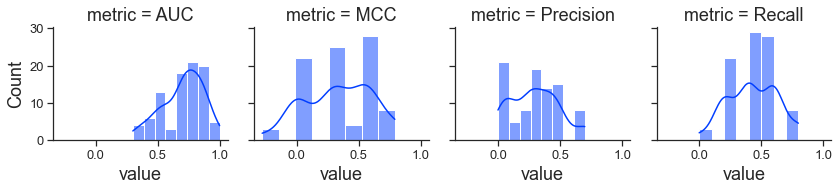

In [50]:
g = sns.FacetGrid(
    data=df, col="metric",
    margin_titles=True
)
g.map_dataframe(
    sns.histplot, x="value", kde=True
)

In [51]:
# Welch ANOVA
W_aov = pd.DataFrame(columns=["metric", "Source", "ddof1", "ddof2", "F", "p-unc", "np2"])
for metr in df.metric.unique():

    # for DI testing
    aov = welch_anova(
        data=df.loc[df.metric==metr],
        dv="value", between="context"
        )
    tmp = tmp = pd.DataFrame({
        "metric": [metr]
    })
    tmp = pd.concat([tmp, aov], axis=1)
    W_aov = W_aov.append(tmp)

dd = W_aov.round(3).copy(deep=True)

dd["p-unc"].astype(np.str_)

def fun(x):
    if float(x) < 0.001:
        return "<0.001"
    else:
        return str(x)

l = []
for i, p in enumerate(dd["p-unc"]):

    l.append(fun(p))

dd["p-unc"] = l
dd.to_clipboard()

W_aov

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1570690087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1570690087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1570690087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/1570690087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W_aov = W_aov.append(tmp)


metric   Source ddof1      ddof2          F     p-unc       np2
0        AUC  context     2  57.830207   8.905744  0.000425  0.163829
0        MCC  context     2  57.513511  17.008073  0.000002  0.260092
0  Precision  context     2  57.540049  15.591486  0.000004  0.253138
0     Recall  context     2  57.711223  18.870899       0.0  0.281082

In [52]:
# pairwise Welch t-test
W = pd.DataFrame(
    columns=["test", "metric", "t", "p-value", "DoF", "d"]
)

# test keys
d = {
    "DI vs. SC": ["DI", "SC"],
    "DI vs. mixed": ["DI", "mixed"],
    "SC vs. mixed": ["SC", "mixed"]
}

i = 0
for k, el in d.items():
    tmp = df.loc[df.context.isin(el)]

    for metr in tmp.metric.unique():
        x = tmp.loc[(tmp.context == el[0]) & (tmp.metric == metr)]["value"]
        y = tmp.loc[(tmp.context == el[1]) & (tmp.metric == metr)]["value"]
        dof = (x.var()/x.size+ y.var()/y.size)**2 / (x.var()**2/((x.size**2)*(x.size-1)) + y.var()**2/((y.size**2)*(y.size-1)))

        t, p = stats.ttest_ind(
            x, y,
            equal_var=False, random_state=42
            )
        # Cohen's d
        dC = (x.mean() - y.mean()) / np.sqrt((x.var() + y.var())/2)

        W = W.append(pd.DataFrame(
            {
            "test": k,
            "metric": metr,
            "t": t,
            "p-value": p,
            "DoF": dof,
            "d": dC
            },
            index=[i]
            )
        )
        i += 1

W = W.groupby(["test", "metric"]).mean() # not actually a mean
W

/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/3189680787.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append(pd.DataFrame(
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/3189680787.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append(pd.DataFrame(
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/3189680787.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append(pd.DataFrame(
/var/folders/97/dkcpng3131bchrg3gdg5bv840000gp/T/ipykernel_51386/3189680787.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  W = W.append(pd.DataFrame(
/var/folders/97/dkcp

t       p-value        DoF         d
test         metric                                                
DI vs. SC    AUC       -4.061244  1.503432e-04  57.167012 -1.048609
             MCC       -5.784471  3.261045e-07  56.829233 -1.493544
             Precision -5.587293  6.995421e-07  56.199896 -1.442633
             Recall    -6.153195  7.608498e-08  57.999615 -1.588748
DI vs. mixed AUC       -1.131578  2.624713e-01  57.969989 -0.292172
             MCC       -2.146803  3.602345e-02  57.714642 -0.554302
             Precision -2.816206  6.690378e-03  56.222784 -0.727141
             Recall    -2.317741  2.410431e-02  56.566529 -0.598438
SC vs. mixed AUC        2.913261  5.087789e-03  57.445723  0.752201
             MCC        3.265252  1.876539e-03  55.511869  0.843084
             Precision  2.555517  1.324703e-02  57.999914  0.659832
             Recall     3.328143  1.541214e-03  56.610318  0.859323